# Reference
This data processing mainly uses materials from this blog https://towardsdatascience.com/hurricane-florence-building-a-simple-storm-track-prediction-model-1e1c404eb045 by 
Kamban Parasuraman

# Importing
First, we have to import a bunch of libraries

In [1]:
! pip install -q -U xarray numpy matplotlib cartopy netCDF4 IPython

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.16.2 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 2.1.1 which is incompatible.


In [2]:
! pip install shapely==2.0.6

In [3]:
! pip install cartopy==0.23.0

In [4]:
! pip install matplotlib==3.9.2

In [5]:
! pip install "numpy<2.0" 

  Using cached numpy-1.26.4-cp310-cp310-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-macosx_11_0_arm64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.1
    Uninstalling numpy-2.1.1:
      Successfully uninstalled numpy-2.1.1


In [6]:
! pip install scipy

In [7]:
! pip install --upgrade pip

In [8]:
! python --version

Python 3.10.14


In [9]:
! pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
appnope                      0.1.4
asttokens                    2.4.1
astunparse                   1.6.3
build                        1.2.1
Cartopy                      0.23.0
certifi                      2024.7.4
cftime                       1.6.4
charset-normalizer           3.3.2
click                        8.1.7
comm                         0.2.2
contourpy                    1.3.0
cycler                       0.12.1
debugpy                      1.8.5
decorator                    5.1.1
exceptiongroup               1.2.2
executing                    2.0.1
flatbuffers                  24.3.25
fonttools                    4.53.1
gast                         0.6.0
google-pasta                 0.2.0
grpcio                       1.66.0
h5py                         3.11.0
idna                         3.7
ipykernel                    6.29.5
ipython                      8.27.0
je

In [1]:
from matplotlib import pyplot as plt
import xarray as xr
import numpy as np
import netCDF4
import pandas as pd

# Reading Data
I am trying to use NetCDF since it seems to be more popular.



In [2]:
xrds = xr.open_dataset('../data/raw/IBTrACS.WP.v04r01.nc')
dimensions = xrds.dims
coords = xrds.coords
print(xrds)

<xarray.Dataset> Size: 1GB
Dimensions:           (storm: 4168, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] 12MB ...
    lat               (storm, date_time) float32 6MB ...
    lon               (storm, date_time) float32 6MB ...
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/159)
    numobs            (storm) float32 17kB ...
    sid               (storm) |S13 54kB ...
    season            (storm) float32 17kB ...
    number            (storm) int16 8kB ...
    basin             (storm, date_time) |S2 3MB ...
    subbasin          (storm, date_time) |S2 3MB ...
    ...                ...
    reunion_gust      (storm, date_time) float32 6MB ...
    reunion_gust_per  (storm, date_time) float32 6MB ...
    usa_seahgt        (storm, date_time) float32 6MB ...
    usa_searad        (storm, date_time, quadrant) float32 24MB ...
    storm_speed       (storm, date_time) float32 6MB ...
    storm_dir        

In [3]:
xrds.to_dataframe().head()

KeyboardInterrupt: 

## Dimensions
The following show all the dimensions

In [13]:
print(dimensions)

FrozenMappingWarningOnValuesAccess({'storm': 4168, 'date_time': 360, 'quadrant': 4})


In [17]:
# print(xrds.data_vars['wmo_agency'])
agencies = pd.DataFrame(xrds.data_vars['wmo_agency'].data)
agencies = np.unique(agencies)
print(agencies)

[b'' b'atcf' b'cphc' b'hurdat_epa' b'newdelhi' b'tokyo']


In [14]:
storm_id = xrds['sid'].values
storm_id

array([b'1884177N17124', b'1884186N16125', b'1884191N15127', ...,
       b'2024225N32152', b'2024226N24137', b'2024226N27150'], dtype='|S13')

In [15]:
print(coords)

Coordinates:
    time     (storm, date_time) datetime64[ns] 12MB ...
    lat      (storm, date_time) float32 6MB ...
    lon      (storm, date_time) float32 6MB ...


In [16]:
print('Description of time')
print(coords['date_time'])

Description of time
<xarray.DataArray 'date_time' (date_time: 360)> Size: 3kB
array([  0,   1,   2, ..., 357, 358, 359])
Dimensions without coordinates: date_time


In [17]:
print('Description of lat')
print(coords['lat'])

Description of lat
<xarray.DataArray 'lat' (storm: 4168, date_time: 360)> Size: 6MB
[1500480 values with dtype=float32]
Coordinates:
    time     (storm, date_time) datetime64[ns] 12MB ...
    lat      (storm, date_time) float32 6MB ...
    lon      (storm, date_time) float32 6MB ...
Dimensions without coordinates: storm, date_time
Attributes:
    long_name:              latitude
    standard_name:          latitude
    units:                  degrees_north
    description:            This is merged position based on the position(s) ...
    Note:                   Variable:lat can be missing since the tracks are ...
    coverage_content_type:  coordinate


In [18]:
print('Description of long')
print(coords['lon'])

Description of long
<xarray.DataArray 'lon' (storm: 4168, date_time: 360)> Size: 6MB
[1500480 values with dtype=float32]
Coordinates:
    time     (storm, date_time) datetime64[ns] 12MB ...
    lat      (storm, date_time) float32 6MB ...
    lon      (storm, date_time) float32 6MB ...
Dimensions without coordinates: storm, date_time
Attributes:
    long_name:              longitude
    standard_name:          longitude
    units:                  degrees_east
    description:            This is merged position based on the position(s) ...
    Note:                   Variable:lon can be missing since the tracks are ...
    coverage_content_type:  coordinate


In [20]:
variables = xrds.data_vars
display(variables)

Data variables:
    numobs            (storm) float32 17kB ...
    sid               (storm) |S13 54kB ...
    season            (storm) float32 17kB ...
    number            (storm) int16 8kB ...
    basin             (storm, date_time) |S2 3MB ...
    subbasin          (storm, date_time) |S2 3MB ...
    name              (storm) |S128 534kB ...
    source_usa        (storm) |S128 534kB ...
    source_jma        (storm) |S128 534kB ...
    source_cma        (storm) |S128 534kB ...
    source_hko        (storm) |S128 534kB ...
    source_kma        (storm) |S128 534kB ...
    source_new        (storm) |S128 534kB ...
    source_reu        (storm) |S128 534kB ...
    source_bom        (storm) |S128 534kB ...
    source_nad        (storm) |S128 534kB ...
    source_wel        (storm) |S128 534kB ...
    source_td5        (storm) |S128 534kB ...
    source_td6        (storm) |S128 534kB ...
    source_ds8        (storm) |S128 534kB ...
    source_neu        (storm) |S128 534kB ...
    so

<xarray.DataArray 'wmo_agency' (storm: 4168, date_time: 360)> Size: 29MB
[1500480 values with dtype=|S19]
Coordinates:
    time     (storm, date_time) datetime64[ns] 12MB 1884-06-24T16:00:00.00002...
    lat      (storm, date_time) float32 6MB ...
    lon      (storm, date_time) float32 6MB ...
Dimensions without coordinates: storm, date_time
Attributes:
    long_name:              Official WMO agency
    coverage_content_type:  thematicClassification

## Reading a Specific Storm
The following is the way to read the track of a storm. The length of the track is at most one year and missing values are represented with `nan`.

In [12]:
# Function to truncate trailing NaN values
def truncate_trailing_nans(arr):
    mask = ~np.isnan(arr)
    if np.any(mask):
        return arr[:mask.argmax() + mask.sum()]
    else:
        return arr[:0]  # Return empty if all are NaN

In [13]:
def count_valid_data_points(array):
    return np.count_nonzero(~np.isnan(array))

max_data_points = 0
storm_with_max_data_points = None

for i in range(len(xrds['storm'])):
    storm = xrds.isel(storm=i)
    lat_count = count_valid_data_points(storm.coords['lat'].values)
    lon_count = count_valid_data_points(storm.coords['lon'].values)
    total_count = lat_count + lon_count
    
    if total_count > max_data_points:
        max_data_points = total_count
        storm_with_max_data_points = storm

# Now storm_with_max_data_points contains the storm with the most data points
selected_storm = storm_with_max_data_points

In [14]:
# selected_storm = xrds.isel(storm=0)

result_dict = {
    'sid': selected_storm['sid'].values,
    'name': selected_storm['name'].values,
    'lat': truncate_trailing_nans(selected_storm.coords['lat'].values),
    'lon': truncate_trailing_nans(selected_storm.coords['lon'].values)
}

result_dict

{'sid': array(b'1994222N11267', dtype='|S13'),
 'name': array(b'JOHN', dtype='|S128'),
 'lat': array([10.6, 10.5, 10.4, 10.4, 10.5, 10.6, 10.8, 11. , 11.1, 11.2, 11.2,
        11.2, 11.2, 11.2, 11.3, 11.4, 11.5, 11.6, 11.8, 11.9, 12. , 12.1,
        12.3, 12.4, 12.5, 12.7, 12.9, 13.1, 13.3, 13.5, 13.7, 13.8, 13.9,
        13.9, 14. , 14. , 14. , 13.9, 13.9, 13.8, 13.8, 13.8, 13.7, 13.6,
        13.6, 13.6, 13.7, 13.7, 13.7, 13.7, 13.7, 13.6, 13.6, 13.7, 13.8,
        14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2, 15.3, 15.3, 15.3, 15.3,
        15.3, 15.3, 15.3, 15.3, 15.3, 15.3, 15.2, 15.1, 15.1, 15.1, 15.1,
        15. , 15. , 15. , 15.1, 15. , 15. , 15. , 15. , 15. , 15. , 14.9,
        14.8, 14.7, 14.6, 14.5, 14.4, 14.3, 14.2, 14.1, 14. , 14. , 14. ,
        13.9, 13.9, 13.9, 14. , 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7,
        14.8, 14.9, 15.1, 15.1, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 16. ,
        16.1, 16.2, 16.3, 16.5, 16.6, 16.8, 17. , 17.1, 17.3, 17.5, 17.8,
        18. , 18.2

# Plotting
I am trying to plot some of the important exploratory statistics, such as the initial point, etc.
(Well... if I figure out.)

## Ploting a Track
Recall that we have actually outputted multiple points and it is likely to be preferable to put it on the map.
The following is a way to do it.

In [15]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### Plotting on a map
The following is source code provided publicly by Kamban Parasuraman from the this [link](https://towardsdatascience.com/hurricane-florence-building-a-simple-storm-track-prediction-model-1e1c404eb045).  
Note that however it is more common to use `Cartopy` rather than `Basemap`. Therefore, I have, with the aid of ChatGPT, rewrite the function using `Cartopy` instead.

```python
# Helper function for Plotting Maps
def MapTemplate(plt_title):
  plt.figure(figsize=(10, 8))
  m1 = Basemap(llcrnrlon=-100.,llcrnrlat=0.,urcrnrlon=30.,urcrnrlat=57.,projection='lcc',lat_1=20.,lat_2=40.,lon_0=-60.,resolution ='l',area_thresh=1000.)    
  m1.drawcoastlines()
  m1.drawparallels(np.arange(10,70,10),labels=[1,1,0,0])
  m1.drawmeridians(np.arange(-100,0,10),labels=[0,0,0,1])
  plt.suptitle(plt_title, fontsize=16)
  return m1
```

In [16]:
def MapTemplate(plt_title, min_lat=0, max_lat=60, min_lon=100, max_lon=280):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal(central_longitude=180, standard_parallels=(20, 40)))
    # ax.set_extent([100, 280, 0, 60], crs=ccrs.PlateCarree())
    ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.gridlines(draw_labels=True, x_inline=False, y_inline=False)
    plt.suptitle(plt_title, fontsize=16)
    plt.tight_layout(rect=[0, 0.2, 1, 1])  # Adjust the rect parameter to leave space for the title
    return ax

In [17]:
lat_range = np.min(result_dict['lat']), np.max(result_dict['lat'])
lon_range = np.min(result_dict['lon']), np.max(result_dict['lon'])

print("Range of lat:", lat_range)
print("Range of lon:", lon_range)

Range of lat: (10.4, 42.5)
Range of lon: (172.9, 266.9)


### Scatter plots

title: Track of the storm: id: 1994222N11267 - JOHN, type: <class 'str'>


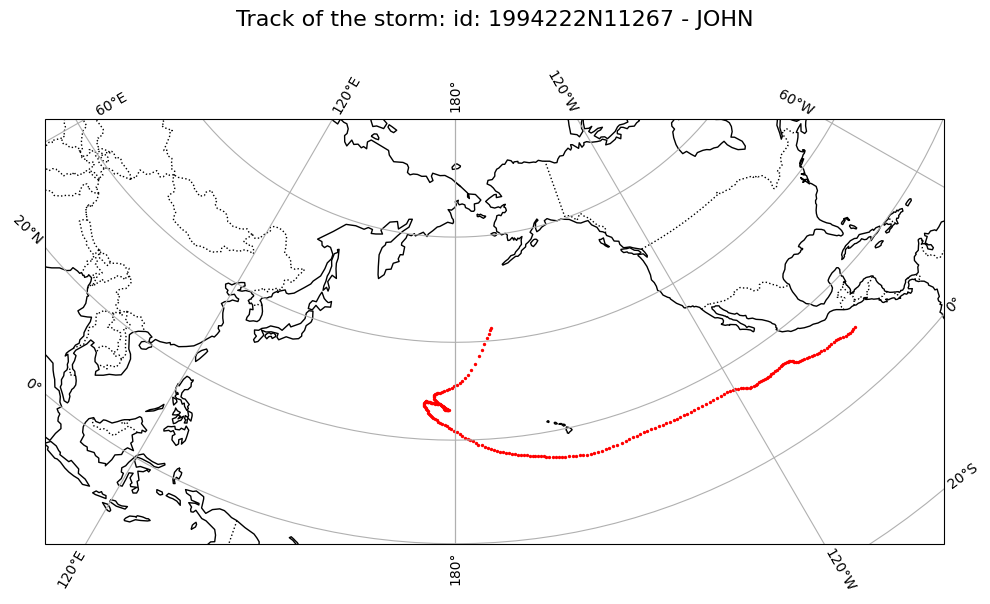

In [18]:
# This cell should plots the path of the first tc on a map.
# The map should have coastlines, borders, and gridlines.
# The map should be centered at the Pacific Ocean.

sid_str = result_dict['sid'].item().decode('utf-8')
name_str = result_dict['name'].item().decode('utf-8')

title = "Track of the storm: id: " + sid_str + " - " + name_str
print(f"title: {title}, type: {type(title)}")

map = MapTemplate(title)
map.scatter(result_dict['lon'], result_dict['lat'], transform=ccrs.PlateCarree(), color='red', s=2)

### Line Plot
This following plot the points as a cointinuous line.

In [19]:
# This cell should plots the path of the first tc on a map.
# The map should have coastlines, borders, and gridlines.
# The map should be centered at the Pacific Ocean.

sid_str = result_dict['sid'].item().decode('utf-8')
name_str = result_dict['name'].item().decode('utf-8')

title = "Track of the storm: id: " + sid_str + " - " + name_str
map = MapTemplate(title)
map.plot(result_dict['lon'], result_dict['lat'], transform=ccrs.PlateCarree(), color='red', linewidth=2)

Error in callback <function flush_figures at 0x168e567a0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

## Batch Plotting
Now, we want to be able to plot the whole batch together to possibly cluster some of those and likely to also derive some insights on how the trend of the track goes.

### All Tropical Cyclones
Note that not all cyclones every perform a landfall.

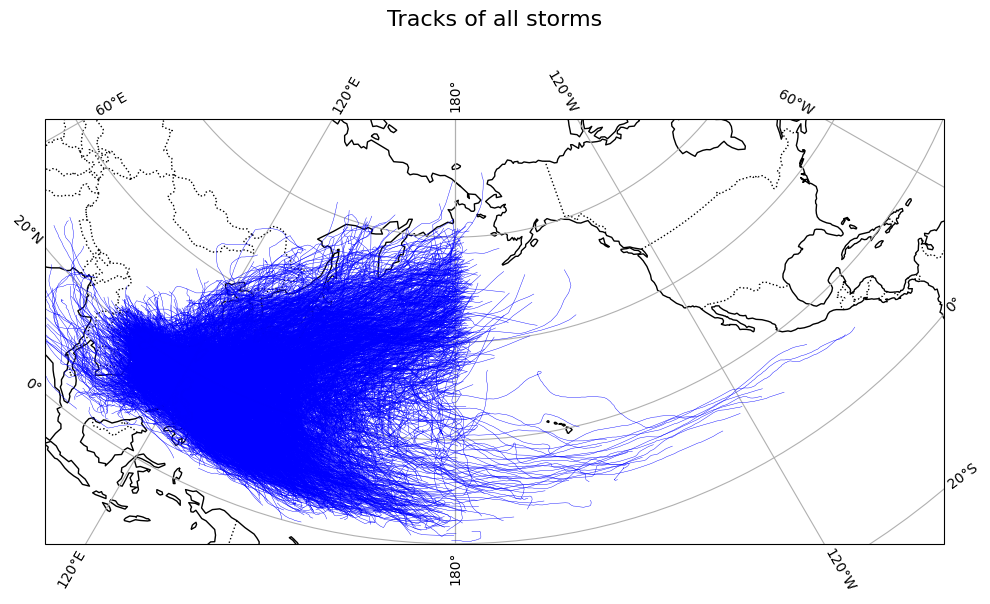

In [27]:
map = MapTemplate("Tracks of all storms")

for i in range(xrds['storm'].shape[0]):
    storm = xrds.isel(storm=i)
    lat = storm.coords['lat'].values
    lon = storm.coords['lon'].values
    if len(lat) > 0 and len(lon) > 0:
        map.plot(lon, lat, transform=ccrs.PlateCarree(), color='blue', linewidth=0.3)

### Landfall Batch Plotting
Now, as mentioned above, all TC might not mean much but we would want to sepcifically examine the ones that actually perform landfalls.
Note that the variable that is used to represent information regarding landfall is `LANDFALL` according to [this](https://www.ncei.noaa.gov/sites/g/files/anmtlf171/files/2024-06/IBTrACS%20v04r01%20column%20documentation.pdf) document that comes with the dataset.

#### Detecting Landfall
Before we can plot the landfalls cyclone, we have to check if the cyclone is a landfall-ing cyclone

In [28]:
def is_landfalling(storm):
    landfall_values = storm['landfall'].values
    if np.any(landfall_values == 0):
        return True
    else:
        return False

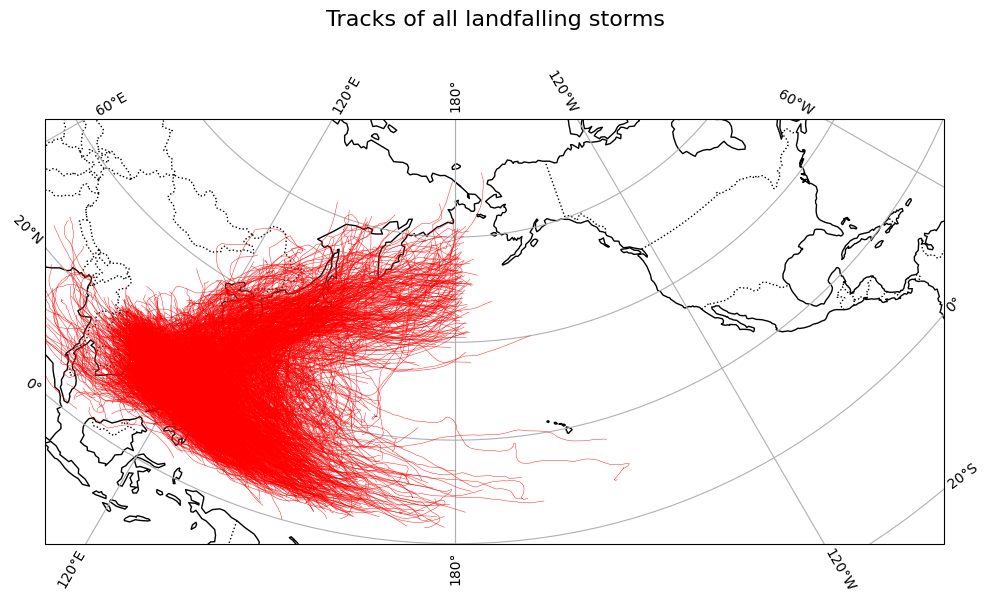

In [29]:
map = MapTemplate("Tracks of all landfalling storms")

for i in range(len(xrds['storm'])):
    storm = xrds.isel(storm=i)
    if is_landfalling(storm):
        lat = storm.coords['lat'].values
        lon = storm.coords['lon'].values
        map.plot(lon, lat, transform=ccrs.PlateCarree(), color='red', linewidth=0.3)

## Moving Average & Count
Maybe I should start with moving average and count graph first since it seems easier to figure out.

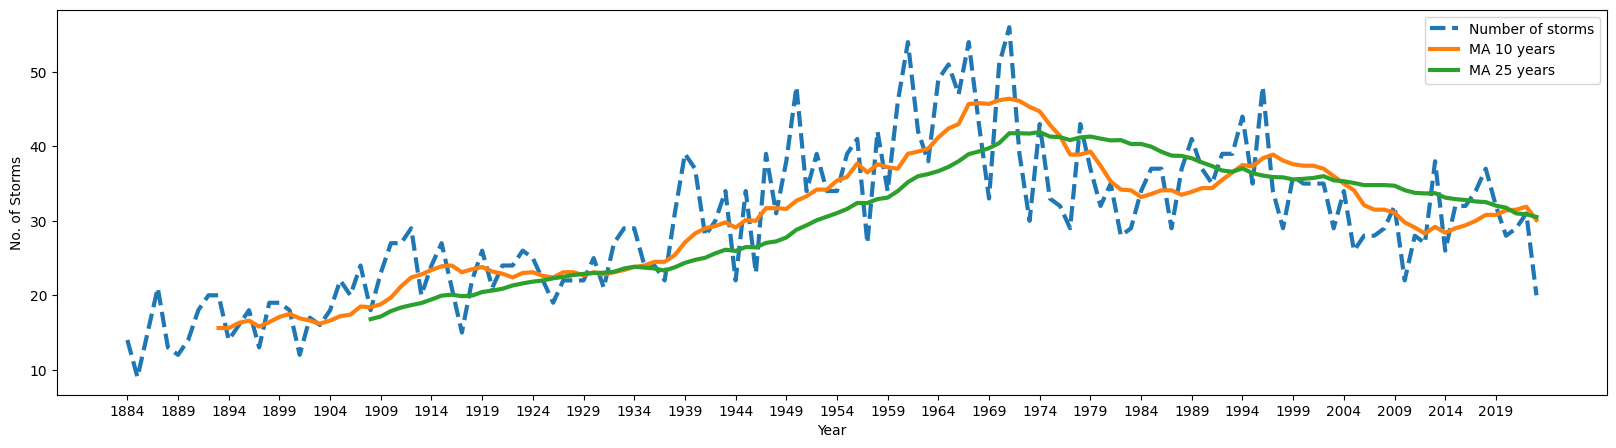

In [30]:
# Group by 'season' and get unique storm IDs
grouped_by_year = xrds.groupby('season').groups

# Convert keys to integers and calculate the number of storms per year
grouped_by_year = {int(year): len(grouped_by_year[year]) for year in grouped_by_year}

# Convert the dictionary to a pandas DataFrame
grouped_by_year = pd.DataFrame(list(grouped_by_year.items()), columns=['Year', 'Number of storms'])

# Set the 'Year' column as the index
grouped_by_year.set_index('Year', inplace=True)

# Drop the last year as it is incomplete
grouped_by_year = grouped_by_year.drop(grouped_by_year.index[-1])

# Aplly the rolling mean
grouped_by_year['RollingMean_10'] = grouped_by_year['Number of storms'].rolling(10).mean()
grouped_by_year['RollingMean_25'] = grouped_by_year['Number of storms'].rolling(25).mean()

# Plotting the number of storms per year
plt.rcParams['figure.figsize'] = (20, 5)
grouped_by_year['Number of storms'].plot(linewidth=3, linestyle='dashed', label='Number of storms')
plt.xticks(np.arange(grouped_by_year.index.min(), grouped_by_year.index.max(), 5))
plt.ylabel('No. of Storms')

# Plot moving averages
grouped_by_year['RollingMean_10'].plot(label='MA 10 years', linewidth=3)
grouped_by_year['RollingMean_25'].plot(label='MA 25 years', linewidth=3)

plt.ylabel('No. of Storms')
plt.xlabel('Year')
plt.legend()
plt.show()

## Genesis

A possible gensis is:  124.0 16.5
A possible gensis is:  125.2 16.1
A possible gensis is:  126.7 14.8
A possible gensis is:  128.5 18.0
A possible gensis is:  126.6 12.9
A possible gensis is:  129.7 12.7
A possible gensis is:  128.4 10.7
A possible gensis is:  127.4 13.4
A possible gensis is:  128.5 15.4
A possible gensis is:  128.5 14.7
A possible gensis is:  124.8 15.8
A possible gensis is:  125.6 10.6
A possible gensis is:  126.0 13.5
A possible gensis is:  124.3 14.1
A possible gensis is:  127.3 10.8
A possible gensis is:  130.5 19.4
A possible gensis is:  134.9 7.3
A possible gensis is:  137.8 12.0
A possible gensis is:  138.9 21.1
A possible gensis is:  114.0 15.5
A possible gensis is:  136.3 11.5
A possible gensis is:  140.8 15.2
A possible gensis is:  137.9 10.3
A possible gensis is:  127.7 18.5
A possible gensis is:  129.8 21.4
A possible gensis is:  141.4 23.8
A possible gensis is:  119.7 22.0
A possible gensis is:  132.7 27.5
A possible gensis is:  124.8 17.4
A possible gens

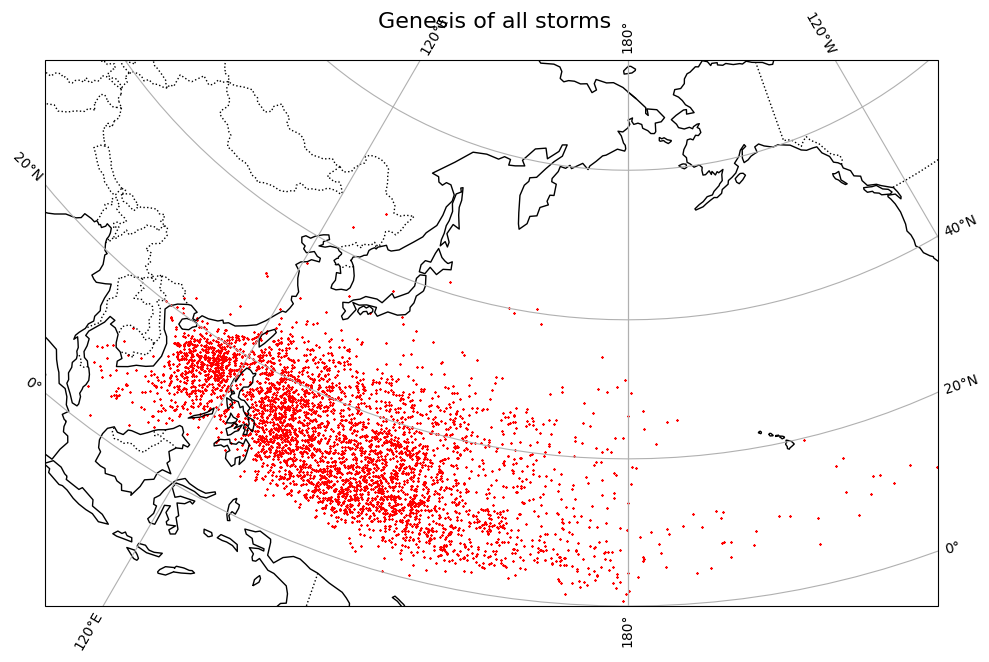

In [31]:
map = MapTemplate("Genesis of all storms", min_lon=100, max_lon=220)
for i in range(len(xrds['storm'])):
    storm = xrds.isel(storm=i)
    lat = storm.coords['lat'].values[0]
    lon = storm.coords['lon'].values[0]
    print("A possible gensis is: ",lon, lat)
    map.scatter(lon, lat, transform=ccrs.PlateCarree(), color='red', s=1, marker='x')